# Project 3: Analyzing Subreddits with NLP and Classifiers
**Submitted by: Melody Wu**  
**March 5, 2021**

## Notebook 01 

## Data Collection

### Import libraries

In [1]:
# import the requests library to scrape data from website
import requests

# import 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.options.display.max_colwidth = 350

### Using `request` and `pushshift` to scape Reddit submissions

### Scrape titles from subreddits

In [3]:
# def a function that will take a subreddit and return a DataFrame with 100 lines of titles

def scrape_subreddit(subreddit, before, after):
    base_url = 'https://api.pushshift.io/reddit/search/submission'
    params = {
        'subreddit': subreddit,
        'size': 100,
        'before': before,
        'after': after
    }
    req = requests.get(base_url, params)
    submits = req.json()['data']
    sub_list = [submit['title'] for submit in submits]
    df = pd.DataFrame(sub_list, columns=['title'])
    df['subreddit'] = subreddit
    return df

In [22]:
def scrape_subreddit_num(subreddit, num):
    df_list = []
    n = num//100
    for i in range(n):
        df = scrape_subreddit(subreddit, f'{1+i*10}d', f'{11+i*10}d')
        df_list.append(df)
    return pd.concat(df_list, ignore_index=True)

### Scrape subreddits and export as csv.

#### Scrape r/FinancialPlanning and export as `fin_plan_titles.csv`  

In [27]:
fin_df = scrape_subreddit_num('FinancialPlanning', 2000)
print(f'return {fin_df.shape[0]} rows of data')

return 2000 rows of data


In [30]:
fin_df.to_csv('../data/fin_plan_titles.csv', index=False, header=True)

#### Scrape r/stocks and export as `stocks_titles.csv`

In [28]:
stocks_df = scrape_subreddit_num('stocks', 2000)
print(f'return {stocks_df.shape[0]} rows of data')

return 2000 rows of data


In [31]:
stocks_df.to_csv('../data/stocks_titles.csv', index=False, header=True)

### Bootstrapping?  

In this section, 500 submissions from each of the two subreddits (r/debtfree and r/investing) were collected by using Pushshift API. Since it is relatively esay to collect additional data, bootscrapping method is not considered in this project. 

## Sentiment Analysis: sentiment and mental supports  

In [32]:
# import sentiment analyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# instantiate 
sia = SentimentIntensityAnalyzer()

In [33]:
# define this as a function 
# def sia_df(subreddit_df):
    

In [34]:
# define a function for analyzing the sentiment of the sentense
# takes a DataFrame with titles and return a new DataFrame with the titles and the sentiment scores

def titles_sia_scores(titles_df):
    scores = []
    for each in titles_df['title']:
        current_scores = sia.polarity_scores(each)
        scores.append(current_scores)

    scores_df = pd.DataFrame(scores)
    return pd.concat([titles_df, scores_df], axis=1)

#### r/FinancialPlanning

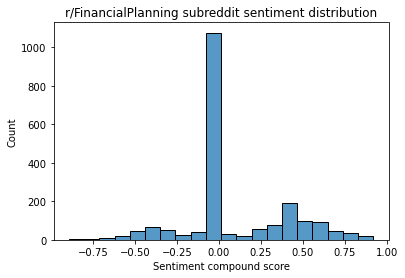

In [41]:
fin_titles = fin_df.dropna(subset=['title']).reset_index(drop=True)

# create the sentiment analysis scores
fin_sia_scores = titles_sia_scores(fin_titles)

# plot the sentiment analysis score distribution
plt.title('r/FinancialPlanning subreddit sentiment distribution')
plt.xlabel('Sentiment compound score')
sns.histplot(data = fin_sia_scores, x ='compound', bins=20);

In [42]:
fin_sia_scores.describe()

,neg,neu,pos,compound
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.047780,0.837571,0.114149,0.104700
std,0.116318,0.207073,0.180847,0.301233
min,0.000000,0.000000,0.000000,-0.893300
25%,0.000000,0.700000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,0.224000,0.340000
max,1.000000,1.000000,1.000000,0.920100


In [43]:
fin_sia_scores.sort_values(by='compound').head(10)

,title,subreddit,neg,neu,pos,compound
1168,Full-Time job w/ School and decent salary but STRESS or Drop to Part-time with big cut in pay,FinancialPlanning,0.455,0.545,0.000,-0.8933
987,Dad's death and mum's cancer financial planning,FinancialPlanning,0.624,0.376,0.000,-0.8519
1247,Paul Addison (army surplus 365) is a fraud and cheater.,FinancialPlanning,0.510,0.490,0.000,-0.8074
409,"With grandfather's death, the siblings are in a fight over the inheretince",FinancialPlanning,0.419,0.581,0.000,-0.7579
1817,The Worst Financial Mistake Anyone Can Make,FinancialPlanning,0.565,0.435,0.000,-0.7579
719,People do crazy things with money. Avoiding these blind spots can help prevent future regrets,FinancialPlanning,0.439,0.395,0.167,-0.7351
820,Guys this is the blueprint to becoming a millionaire all you have to do is start saving $8K a month AND DON’T FORGET TO WAKE UP EARLY OTHERWISE YOU WILL BE BROKE FOR THE REST OF YOUR LIFE,FinancialPlanning,0.154,0.846,0.000,-0.7324
152,Make a monthly budget AND PAY OFF DEBT! ✅✅,FinancialPlanning,0.485,0.515,0.000,-0.6866
612,Acorns is not my only (or favorite) investing platform but it has given me solid returns and performed well during the crash. Someone in another discussion claimed I was lying about acorns returns so here it is.,FinancialPlanning,0.182,0.716,0.102,-0.6808
563,Pay off debt or bolster emergency fund?,FinancialPlanning,0.619,0.381,0.000,-0.6705


In [44]:
fin_sia_scores.sort_values(by='compound', ascending=False).head(10)

,title,subreddit,neg,neu,pos,compound
860,Congress created a new above-the-line deduction for charitable donations of up to $300. I've done well this year. Can you recommend any good organizations worthy of a $300 donation?,FinancialPlanning,0.000,0.582,0.418,0.9201
896,Looking for an Investment Opportunity or advice... You might be entertained in the process :) **Serious Inquires Only** My first post ever!! Enjoy or just scroll. The Choice is Yours!,FinancialPlanning,0.000,0.674,0.326,0.9114
1284,Pretty happy with my last 12 months net worth gain. I’ve been avidly saving during the pandemic and becoming more strict with my budget.,FinancialPlanning,0.000,0.621,0.379,0.9042
30,"Looking To Grow Industrial Portfolio, Parkit (PKT on the TSX &amp; PKTEF on Nasdaq) Raises Up to $84 Million and is Ready Grow into a Mega Real Estate Company with SO much cash on hand, to Execute on Becoming the Largest &amp; Best in Class A Industrial Stocks in North America!",FinancialPlanning,0.000,0.819,0.181,0.8805
138,Have you ever thought about how the rich pay less taxes than you do? and they are doing it legally! I made an animated story about how the rich pay less taxes. Hope you can learn something from them!,FinancialPlanning,0.060,0.687,0.253,0.8752
137,Have you ever thought about how the rich pay less taxes than you do? and they are doing it legally! I made an animated story about how the rich pay less taxes. Hope you can learn something from them!,FinancialPlanning,0.060,0.687,0.253,0.8752
549,My friend is really good at making nice pfps for people and I told him to maybe sell those so he can earn some pocket money and he agrees,FinancialPlanning,0.000,0.686,0.314,0.8748
1186,Paid off my credit card debt completely today. (Started at $37K in 2015). So happy and so relieved. It was quite the trip from there to here! My strategy for paying it off is in the comments if anyone is interested.,FinancialPlanning,0.049,0.706,0.245,0.8744
660,"What are some good books to read to understand more about wealth management, investing, and building wealth?",FinancialPlanning,0.000,0.587,0.413,0.8707
267,"I tried my hand at making an educational youtube video about compound interest, any feedback would be appreciated!",FinancialPlanning,0.000,0.588,0.412,0.8687


In [45]:
#### r/stocks

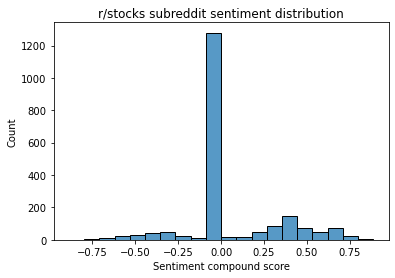

In [46]:
stocks_titles = stocks_df.dropna(subset=['title']).reset_index(drop=True)

# create the sentiment analysis scores
stocks_sia_scores = titles_sia_scores(stocks_titles)

# plot the sentiment analysis score distribution
plt.title('r/stocks subreddit sentiment distribution')
plt.xlabel('Sentiment compound score')
sns.histplot(data = stocks_sia_scores, x ='compound', bins=20);

In [47]:
stocks_sia_scores.sort_values(by='compound').head(10)

,title,subreddit,neg,neu,pos,compound
1151,"What is it with this sub and the rude, unsupportive and hateful members? It really frustrates me and makes me hesitant to ask questions.",stocks,0.363,0.637,0.00,-0.8858
1475,Eternal Damnation and Sadness,stocks,0.765,0.235,0.00,-0.7579
1840,Well.. some guy just crossed 200$B !! .. and here I am .. 80k in a fucking useless education debt 😂😂,stocks,0.275,0.725,0.00,-0.7536
203,Account Deficit is driving me crazy and I'm confused,stocks,0.552,0.448,0.00,-0.7506
1017,Advice on how to minimize my losses on a shitty trading decision,stocks,0.412,0.588,0.00,-0.7430
1435,"Tyson Foods still severely undervalued compared to other food stocks despite offering an essential product, do you think no one invests on this company because people want to have moral high ground and avoid company that slaughters animals?",stocks,0.173,0.796,0.03,-0.7269
1383,I had a failed startup and almost went broke until I started trading.,stocks,0.421,0.579,0.00,-0.7024
749,BLRX cured pancreatic cancer!,stocks,0.610,0.390,0.00,-0.6900
1822,Why the hell is Tesla at $2200?,stocks,0.434,0.566,0.00,-0.6808
393,What the hell is going on with PLTR,stocks,0.397,0.603,0.00,-0.6808


In [48]:
stocks_sia_scores.sort_values(by='compound', ascending=False).head(10)

,title,subreddit,neg,neu,pos,compound
1031,What is the best source to find historical data of shares outstanding for individual stocks?,stocks,0.000,0.536,0.464,0.8860
874,"200$ usd to get started, best investments I can make right this moment? And should I invest more or is this a good amount to get started? Looking for long term gains",stocks,0.000,0.716,0.284,0.8843
1360,"Purple Innovation (PRPL) - Over 50% gain since September; Analysts Continue Supporting Story. New plays: IPOB, OAC?",stocks,0.000,0.524,0.476,0.8720
1899,PBF ENERGY cracks 5% gain on the day following more institutional investors and economic positivity.,stocks,0.000,0.557,0.443,0.8602
794,"So I am new to buying stocks and was wondering what are the best dollar stocks to buy right now I have 1,000 dollars available to spend and was wondering what you guys thought were the best options right now",stocks,0.000,0.811,0.189,0.8555
1890,Please recommend a safe broker supported in EU for this noob.,stocks,0.077,0.308,0.615,0.8294
1099,"The DOW is going to be 30,000 by the time Donald Trump leaves office. Love him or hate him, that's pretty remarkable",stocks,0.113,0.550,0.336,0.8074
1458,CRSP cofounder Emmanuelle Charpentier wins Nobel Prize in Chemistry for gene editing,stocks,0.000,0.588,0.412,0.7906
1749,"Hi everyone I’m new to investing and I put 50 dollars into my account and I need to know what to invest in, any good stocks in that range for longtime growth (US). I also plan on putting in 100 dollars every quarter and I would also like advice on how to invest that",stocks,0.000,0.855,0.145,0.7906
664,FREE RANDOM $200 SHARE,stocks,0.000,0.223,0.777,0.7885
